สิ่งที่ต้องทำ
Load dataset และทำการ explore โครงสร้างของข้อมูลเบื้องต้น
Visualize ความสัมพันธ์ระหว่าง Hours Studied กับ Passed
สร้างโมเดล Logistic Regression เพื่อทำนายความน่าจะเป็นในการทำข้อสอบผ่านโดยอ้างอิงจากจำนวนชั่วโมงของการอ่านหนังสือ
Evaluate ประสิทธิภาพของโมเดลโดยใช้ metrics ที่เหมาะสม
ใช้โมเดลเพื่อทำนายว่านักเรียนที่มีชั่วโมงในการอ่านหนังสือ 4 ชั่วโมงจะทำข้อสอบผ่านหรือไม่

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("study.csv")

In [6]:
df.head()

,Hours Studied,Passed
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours Studied  6 non-null      int64
 1   Passed         6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


In [7]:
X = df[['Hours Studied']]  # Features
y = df['Passed']  # Target

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = logreg.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

c:\Users\kongp\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [15]:
print(accuracy)
print(conf_matrix)
print(class_report)

1.0
[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



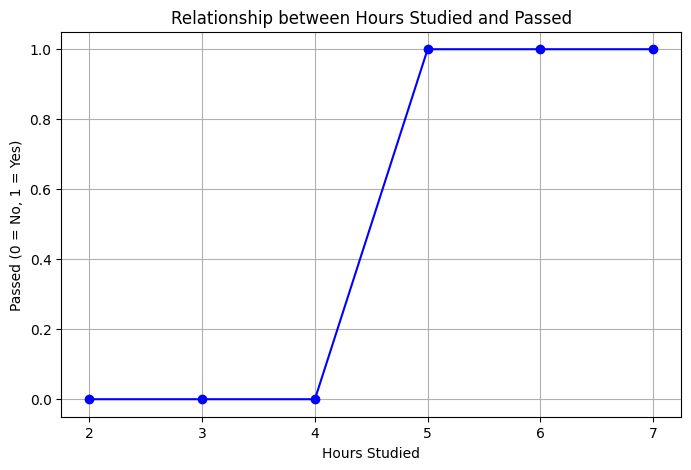

In [31]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Hours Studied'], y=df['Passed'], marker='o')

# Draw a line connecting the points to show the trend
plt.plot(df['Hours Studied'], df['Passed'], color='blue', linestyle='-', marker='o')

# Add labels and title to the plot
plt.xlabel('Hours Studied')
plt.ylabel('Passed (0 = No, 1 = Yes)')
plt.title('Relationship between Hours Studied and Passed')
plt.grid(True)
plt.show()

In [19]:
# Predict for a student who studied 4 hours
prediction_prob = logreg.predict_proba([[4]])[0, 1]  # Probability of passing
prediction = logreg.predict([[4]])[0]  # Predicted class (0 or 1)

c:\Users\kongp\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kongp\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
# Probability of passing
print(prediction_prob)
print(prediction)

0.5179143357220307
1


โอกาสสอบผ่านของคนอ่านหนังสือ4ชม.คือ 50%